# LQ earnings vs LQ house price vs waiting List

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot


In [44]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)
homeless = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=5, skiprows = 1)

homeless = homeless.drop(homeless.iloc[:,2:6], axis=1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=6)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)

merged_all = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged_all = merged_all.drop(merged.iloc[:, :0], axis=1)


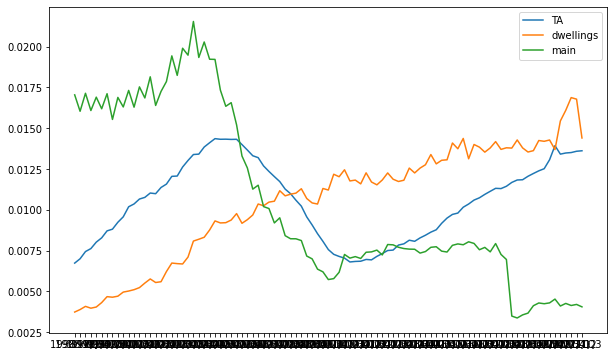

In [89]:
# quarterly data on homelessness and the waiting list
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=3)
TA = df.iloc[0:, 3]
TA_norm = [float(i)/sum(TA) for i in TA]

dwellings = df.iloc[0:, 4]
dwellings_norm = [float(i)/sum(dwellings) for i in dwellings]

main = df.iloc[0:, 5]
main_norm =  [float(i)/sum(main) for i in main]

plt.plot(df.iloc[0:, 2], TA_norm, label = "TA")
plt.plot(df.iloc[0:, 2], dwellings_norm, label = "dwellings")
plt.plot(df.iloc[0:, 2], main_norm, label = "main")
plt.legend()



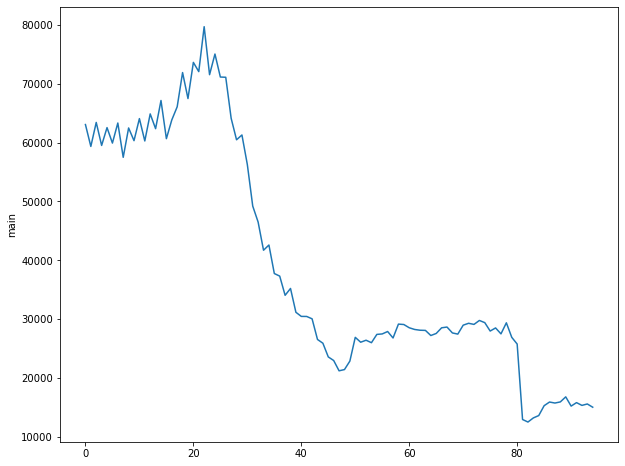

In [90]:
# before removing trend
plt.figure(figsize=(10,8))
sns.lineplot(data=df['main'], palette="deep");

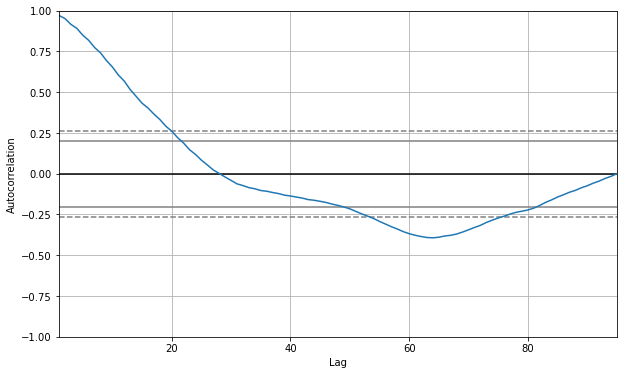

In [47]:
# autocorralation
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=3)
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df['main']);

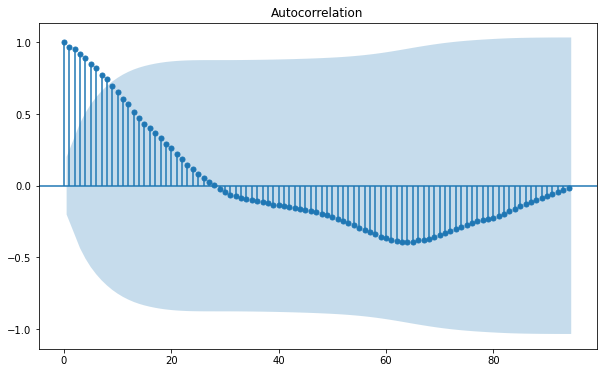

In [48]:
import statsmodels.api as sm
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(df['main'], lags = 94);

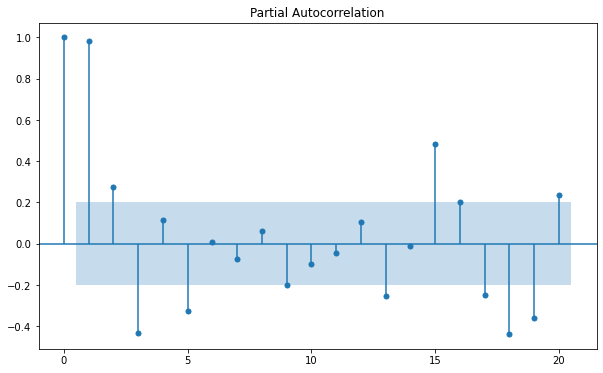

In [49]:
# partial autocorrelation
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df['main']);

## Removing Trend

FileCreateError: [Errno 13] Permission denied: 'Data/TS_trend.xlsx'

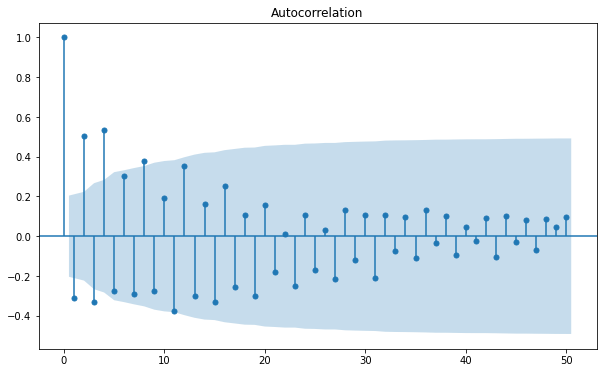

In [142]:
# removing trend by differencing to make time-sereis data stationary
data = df['main'] - df['main'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data[1:], lags=50);


data.to_excel("Data/TS_trend.xlsx")

,Unnamed: 0,dwellings,main
0,0,NaN,NaN
1,1,NaN,-3720.0
2,2,NaN,4080.0
3,3,-2416.000000,-3910.0
4,4,1563.000000,3030.0
...,...,...,...
90,90,37836.000000,-1570.0
91,91,14064.000000,590.0
92,92,16764.333333,-470.0
93,93,-2048.000000,240.0


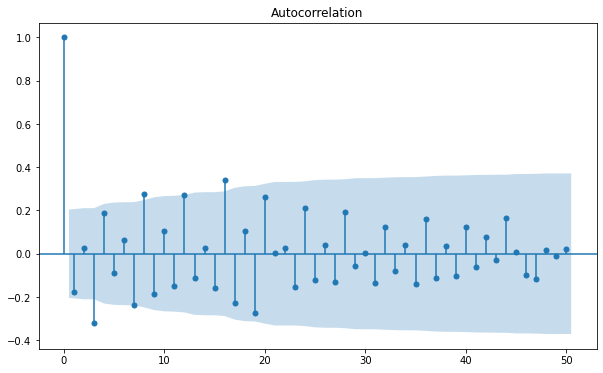

In [149]:
data1 = df['dwellings'] - df['dwellings'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data1[1:], lags=50);

df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)
df_trend.insert(loc=1,
          column='dwellings',
          value=data1)
display(df_trend)

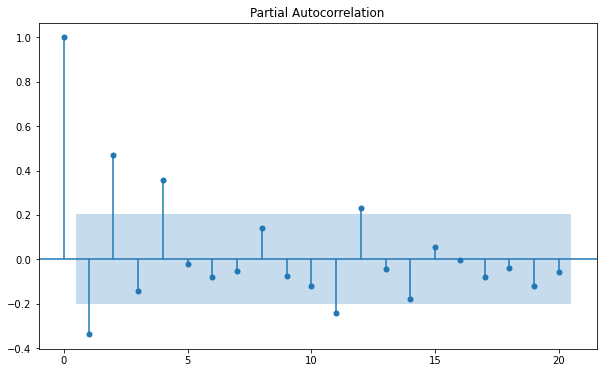

In [51]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data[1:]);

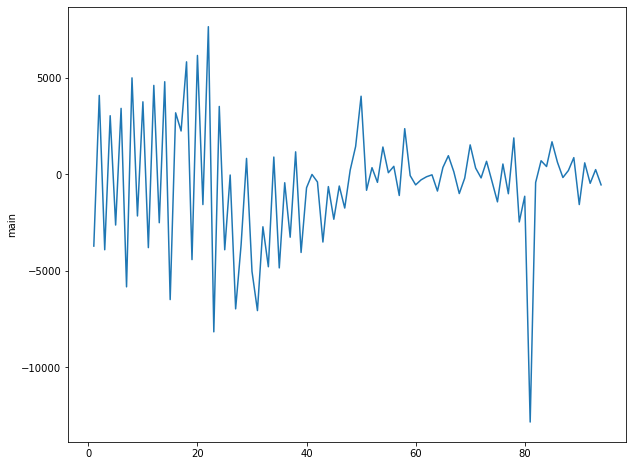

In [52]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data[1:], palette="deep");

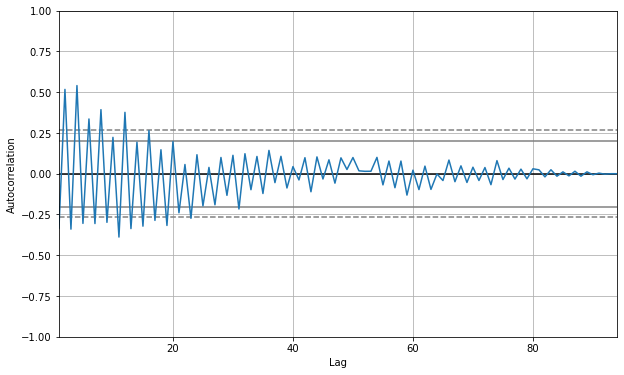

In [53]:
pd.plotting.autocorrelation_plot(data[1:]);

In [65]:
def corr_matrix(df):
    #correlation_matrix = df.drop(['volume'], axis=1)
    correlation_matrix = df.drop(['year'], axis =1).corr()
    print(correlation_matrix)
    
    fig, ax = plt.subplots(figsize=(13,10))

    sns.heatmap(correlation_matrix,
                annot=True,
                fmt='.2f',
                #cmap='YlGnBu',
                ax=ax);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

                 TA  dwellings      main
TA         1.000000   0.119312  0.193177
dwellings  0.119312   1.000000 -0.872733
main       0.193177  -0.872733  1.000000


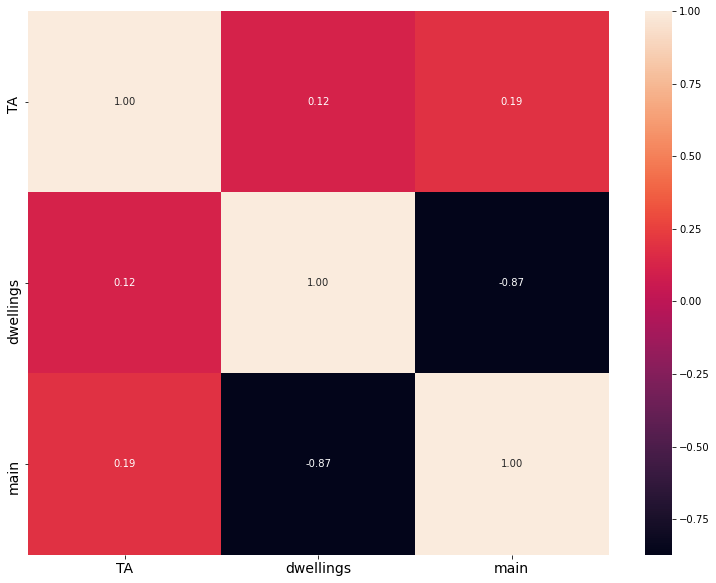

In [66]:
corr_matrix(df)

## Stationarity

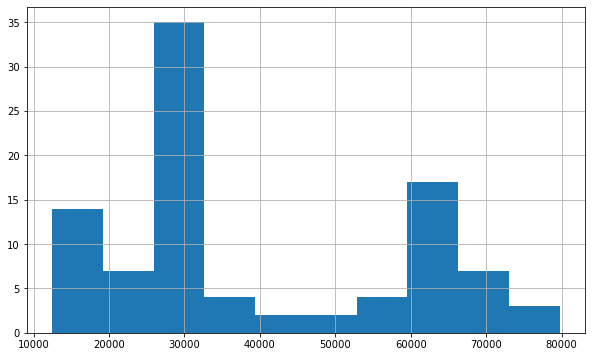

In [67]:
# review summary statistics
df['main'].hist()
plt.show();

In [68]:
X = df['main'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=53817.291667, mean2=23792.765957
variance1=273529365.581597, variance2=36125777.455862


In [69]:
# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. 
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

from statsmodels.tsa.stattools import adfuller

X = df['main'].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.240789
p-value: 0.655808
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [70]:
# try with the removed trend data

X = data[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -2.891976
p-value: 0.046289
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [71]:
X = data[1:].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=-890.851064, mean2=-131.702128
variance1=15434777.999095, variance2=4701682.209144


In [158]:
# pearson's r computed using Pandas and Scipy after removing trends and making stationary
# overall_pearson_r = merged.corr().iloc[0,1]

overall_pearson_r = df_trend.corr().iloc[1,2]
display(df_trend.iloc[1,2])
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df_trend.dropna()['main'], df_trend.dropna()['dwellings'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


-3720.0

Pandas computed Pearson r: 0.18441430891493468
Scipy computed Pearson r: 0.1844143089149346 and p-value: 0.07844477267588867


In [94]:
# pearson's r computed using Pandas and Scipy

overall_pearson_r = (TA,dwellings)
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['homeless'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: (0     47520
1     49390
2     52510
3     53790
4     56580
      ...  
90    94610
91    95100
92    95290
93    95850
94    96060
Name: TA, Length: 95, dtype: int64, 0      80650.000000
1      83933.000000
2      88147.000000
3      85731.000000
4      87294.000000
          ...      
90    333202.666667
91    347266.666667
92    364031.000000
93    361983.000000
94    310666.333333
Name: dwellings, Length: 95, dtype: float64)
Scipy computed Pearson r: -0.40419041277632484 and p-value: 0.05576506254058324
